# [#4.Lab] Linear Regression Practice  

## Data Generation

In [16]:
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

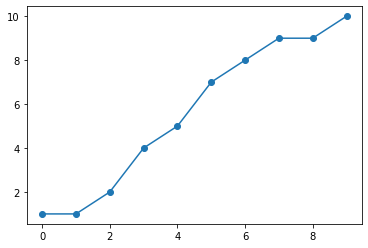

In [17]:
import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.scatter(X, Y)

## Hypothesis(함수) 정의

In [18]:
class H():

    def __init__(self, w):  # 이 class는 w를 input으로 받음
        self.w = w          # w를 저장

    # pytorch에서는 H(x)를 통과시킬 때 forward라는 함수를 사용
    def forward(self, x):
        return self.w * x   # 여기에서 H(X)를 계산


def cost(h, X, Y) :
    error = 0
    for  i  in range(len(X)):
        error += (h.forward(X[i]) - Y[i])** 2  # 각각의 instance에 대해 cost value를 구함
    error = error / len(X)                     # error를 전체 개수로 나누어 평균을 계산
    return error    

h = H(4)                    # w가 4인 가설을 만듦    
# print(h.w)                # 밖에서 h의 변수를 보고 싶을 때
cost(h, X, Y)               # 이 가설일 때, 내가 가진 X, Y를 넣어 cost value를 계산

222.2

## cost surface
- w가 바뀜에 따라 cost가 정말 바뀌는지 확인
- for문 이용해서 다양한 h(가설)을 시도

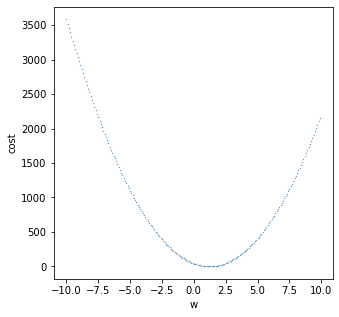

In [19]:
list_w = []
list_c = []
for i in range(-100, 100):          # 여러 개의 hypothesis를 test
    w = i * 0.1                     # 0.1 ~ 1
    h = H(w)                        # 매번 새로 생성된 w 파라미터를 갖는 h를 생성
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

plt.figure(figsize=(5,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)  # list_w와 list_c의 길이가 맞지 않으면 error 발생


## Train
1. 수치해석적으로 직접 gradient 구하기
2. gradient 공식을 통해서 한 번에 gradient를 구하기


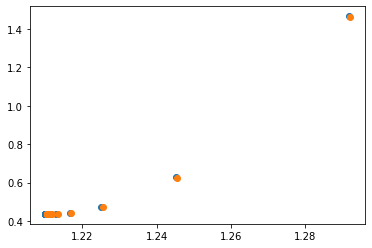

In [31]:
# 수치해석적
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.001
    h = H(w+eps)            # h 재정의
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1   # delta cost
    dw = eps
    grad = dcost / dw       # 근사하는 gradient
    return grad, (cost1+cost2)*0.5  

# gradient 공식
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]  # i번째 instance에 대한 grad값
    grad = grad / len(X)    # grad의 평균값
    c = cost(h, X, Y)
    return grad, c


# w update
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

# print(cal_grad(4, cost))  
# (4, cost) : w가 4인 지점에서 cost를 구함. 여기서 cost는 값이 아니라 cost를 계산하는 함수를 인자로 넣어준 것

for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    # w = w + lr * (-cal_grad(w, cost))      # (-grad) : 반대 방향으로 가야 하기 때문 
    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

    # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)
